# Gaussian Mixture Model - GMM

# GMM for image Segmentation

In [73]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import matplotlib.image as mpimg
import cv2
from sklearn.cluster import KMeans
#from sklearn.mixture import GMM

In [74]:
np.random.seed(1)
np.random.rand(4)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01])

In [75]:
img=mpimg.imread('k1.jpg')
img = cv2. rotate(img,cv2.cv2.ROTATE_90_CLOCKWISE)

In [76]:
#img.shape

In [77]:
#img = cv2.imread('dog_test.jpg')
#plt.imshow(img)
#img.shape

(256, 256, 3)

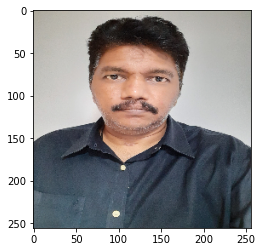

In [78]:
img = cv2.resize(img, (256, 256))
plt.imshow(img)
img.shape

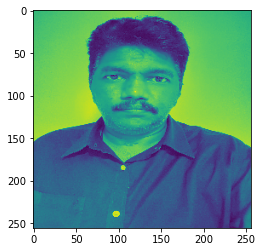

In [79]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape
plt.imshow(img)

In [80]:
img.shape

(256, 256)

In [81]:
hist, bin_edges = np.histogram(img, bins=64)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

([], [])

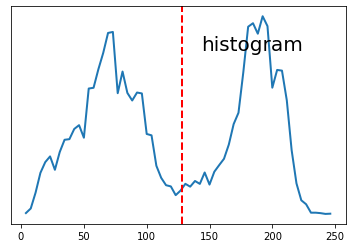

In [82]:
plt.plot(bin_centers, hist, lw=2)
plt.axvline(128, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])

# Fit the Gaussian Distribution to Data

In [83]:
gmm = GaussianMixture(n_components=2)
gmm.fit(img.reshape((img.size, 1)))
threshold = np.mean(gmm.means_)
binary_img = img > threshold

# Fit to Model and Predict the label.

In [84]:
G = gmm.fit_predict(img.reshape((img.size, 1)), y=None)

In [85]:
G_1 = G.reshape(256,256)

# Prediction Probabilities that a Pixel Belongs to a specified cluster.

In [86]:
probs = gmm.predict_proba(img.reshape((img.size, 1)))

# Choose starting guesses for the location and shape

# Repeat until converged:

# Step_1(E-step): for each point, find weights encoding the probability of membership in each cluster
# Step_2(M-step): for each cluster, update its location, normalization, and shape based on all data points, making use of the weights

In [87]:
print(probs.round(3))

[[0.993 0.007]
 [0.991 0.009]
 [0.987 0.013]
 ...
 [0.001 0.999]
 [0.004 0.996]
 [0.001 0.999]]


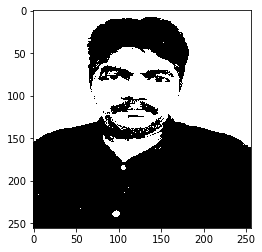

In [88]:
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')

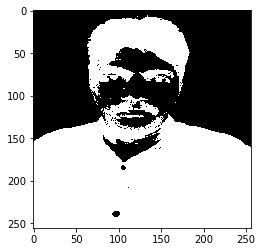

In [89]:
plt.imshow(G_1, cmap=plt.cm.gray, interpolation='nearest')

In [90]:
kmeans = KMeans(n_clusters=100, init='k-means++', max_iter=150, verbose=True, n_init=10, random_state=0)

In [91]:
pred_y = kmeans.fit_predict(img.reshape((img.size, 1)))

Initialization complete
Iteration 0, inertia 34929.0
Iteration 1, inertia 29661.233691443096
Iteration 2, inertia 26020.68325354514
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 34961.0
Iteration 1, inertia 28245.57039783805
Iteration 2, inertia 25678.24390741225
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 34137.0
Iteration 1, inertia 27495.312506085513
Iteration 2, inertia 25576.877558449887
Iteration 3, inertia 25527.768913719206
Converged at iteration 3: center shift 0.22288981043818254 within tolerance 0.3948051177758491.
Initialization complete
Iteration 0, inertia 35035.0
Iteration 1, inertia 28953.650953522334
Iteration 2, inertia 26212.437318272827
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 35307.0
Iteration 1, inertia 27747.116448447367
Iteration 2, inertia 25247.96238664552
Converged at iteration 2: strict convergence.
Initialization comp

In [92]:
threshold = np.mean(kmeans.labels_)
binary_img = img > threshold

In [93]:
threshold

43.67462158203125

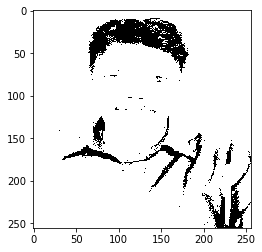

In [94]:
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')

In [95]:
print(gmm.means_)

[[187.10616638]
 [ 70.65672289]]


In [96]:
print(gmm.covariances_)

[[[343.47449781]]

 [[799.0659643 ]]]
